# Лабораторная работа № 2.
Обучение сверточной нейронной сети ResNet18 с применением трансферного обучения
и аугментации данных.

# Цель работы
Получить классификации изображений с помощью сверточных нейронных сетей с применением трансферного обучения и аугментации данных с использованием библиотеки машинного обучения PyTorch.
# Задачи
1. Ознакомиться с работой сверточных нейронных сетей в библиотеке PyTorch;
2. Научиться решать задачу классификации изображений на основе нейронных сетей.
3. Научиться применять методы трансферного обучения с использованием библиотеки PyTorch.
4. Научиться применять методы аугментации данных с использованием библиотеки PyTorch.

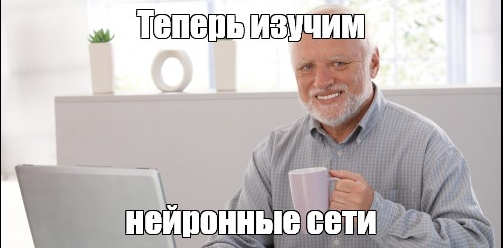

# Немного теории

## Сверточные нейронные сети


### Сверточные слои (convolution layer)
Сверточные нейросети — это модель глубокого обучения, один из видов искусственных нейросетей. В ёё основе — математическая операция свертки.
**Двумерная свертка (2D convolution)** — это довольно простая операция: начинаем с ядра, представляющего из себя матрицу весов (weight matrix). Ядро “скользит” над двумерным изображением, поэлементно выполняя операцию умножения с той частью входных данных, над которой оно сейчас находится, и затем суммирует все полученные значения в один выходной пиксель.
Алгоритм работы операции двумерной свертки представлен на gif:

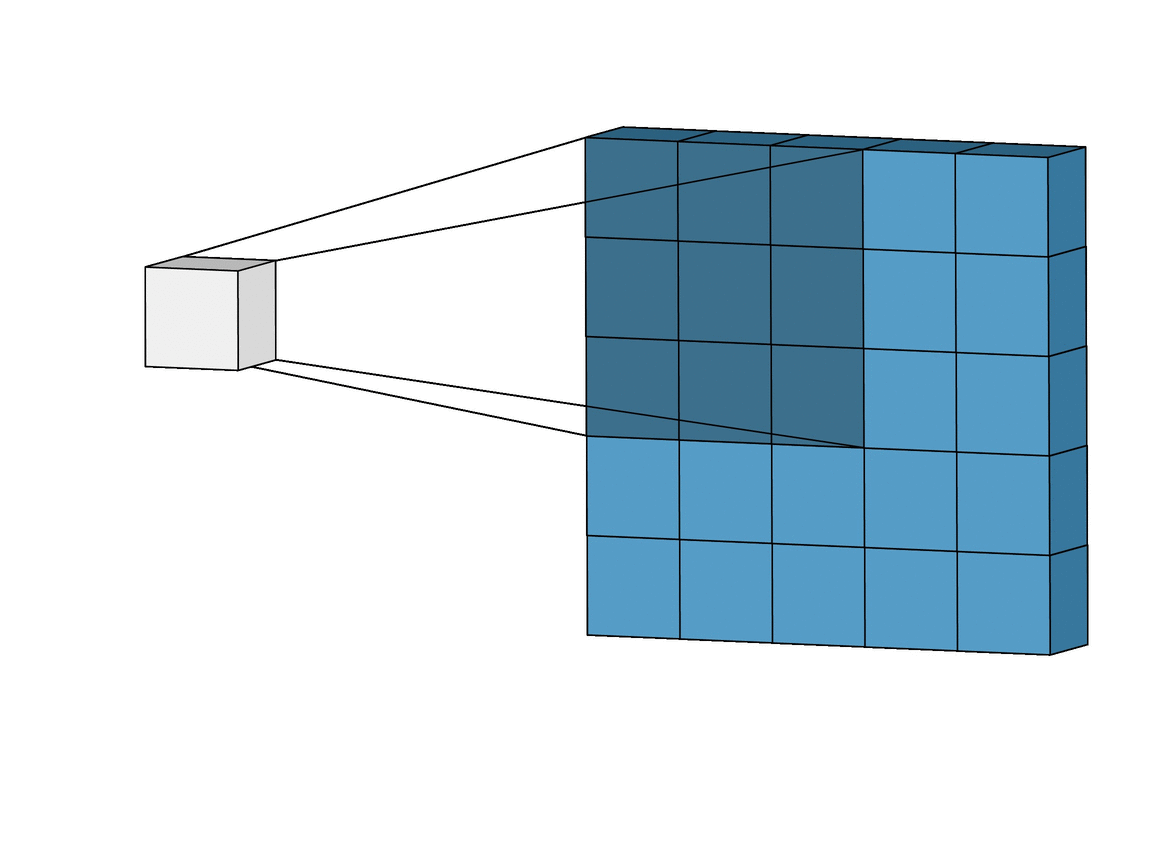

Такой способ извлечения признаков позволяет:

1.   Сократить количество обучаемых параметров. Например на приведенной выше gif мы имеем 5*5=25 признаков на входе и 3*3=9 признаков на выходе. Для стандартного слоя (standard fully connected layer) мы бы имели весовую матрицу 25*9 = 225 параметров, а каждый выходной признак являлся бы взвешенной суммой всех признаков на входе. Свертка позволяет произвести такую операцию с всего 9-ю параметрами
2.    Во время свёртки нейросеть удаляет лишнее и оставляет полезное — то, что поможет проанализировать изображение. Например, линии, края или ровные области.

У свертки есть несколько важных параметров (из [документации](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) PyTorch):


*   in_channels (int) – количество входных каналов
*   out_channels (int) – количество выходных каналов
*   kernel_size (int or tuple) – размер окна ядра свертки
*   padding (int, tuple or str, optional) – добавляет к краям поддельные (fake) пиксели (обычно нулевого значения, вследствие этого к ним применяется термин “нулевое дополнение” — “zero padding”). Таким образом, ядро при проскальзывании позволяет неподдельным пикселям оказываться в своем центре, а затем распространяется на поддельные пиксели за пределами края, создавая выходную матрицу того же размера, что и входная.



### Слои пуллинга (pooling layer)

После свёрточного слоя идёт слой пулинга. Из признаков, которые выделил свёрточный слой, выбирает самые важные, а несущественные удаляет. К результату, который получился во время пулинга, можно снова применить свёрточный слой и сделать несколько циклов. Это нужно, чтобы выстроить иерархию признаков: от самых примитивных, например кусочков контура, до более сложных, например глаз кошки или формы её ушей.

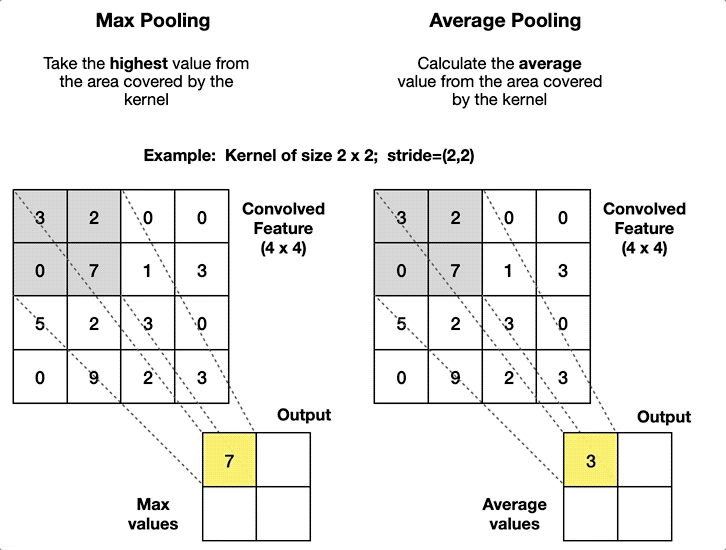

### Пара примеров, как нейросеть извлекает признаки из изображений

Первые слои нейросети. Здесь она ищет границы объектов по перепадам света. Пример от Adit Deshpande

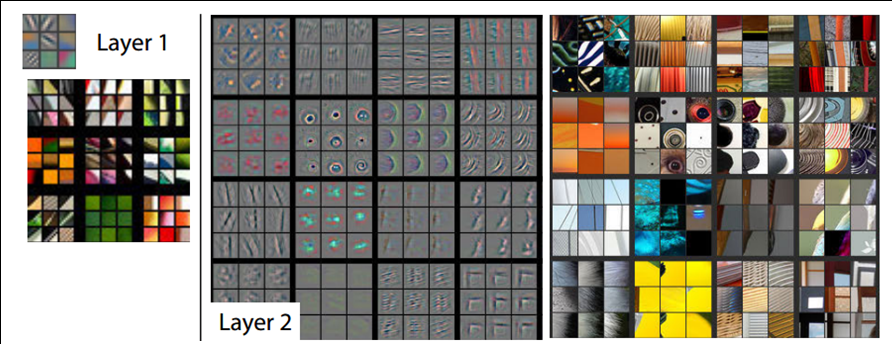

На последних слоях нейросеть пытается понять, что или кто перед ней. Например, есть что-то похожее на колёса. Возможно, на фотографии велосипед. Но это не точно, поэтому альтернативный вариант — глаза птиц.

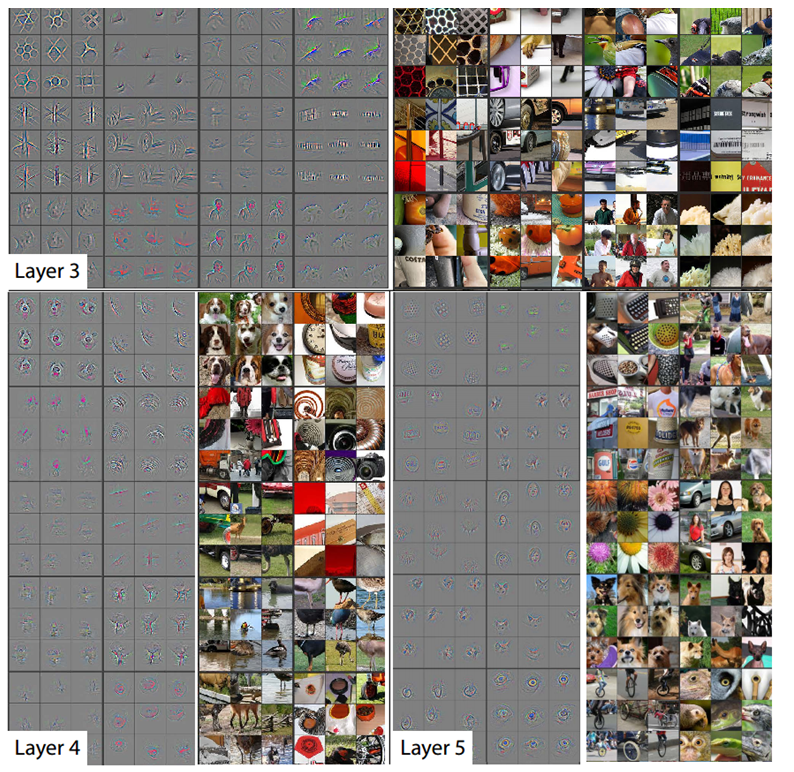

Сложные признаки, которые получились на последних слоях, нейросеть будет классифицировать с помощью полносвязного слоя, чтобы найти ответ на вопрос, что изображено на картинке, сова или кошка.

## Собираем все в нейросеть

Нагляднее всего архитектуру свёрточной нейросети можно показать примере — ResNet.

**ResNet (Residual Network)** является одной из самых популярных сверточных нейросетей. Она была представлена в 2015 году и быстро стала одной из наиболее используемых нейросетей в области компьютерного зрения.

ResNet смогла преодолеть одну из основных проблем нейросетей - затухание градиента, которая возникает, когда градиенты начинают сходиться к нулю, что приводит к уменьшению скорости обучения и качества модели.

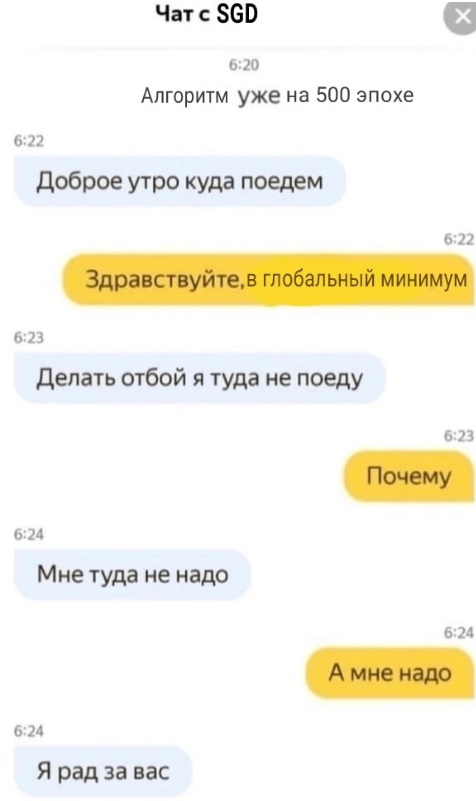

Одним из основных преимуществ ResNet является то, что она может обрабатывать глубокие нейросети, что позволяет достичь более высоких показателей точности в области распознавания изображений.

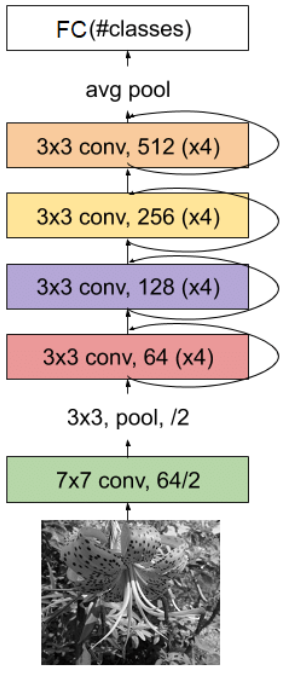


ResNet состоит из нескольких типовых шагов с типовыми операциями: свёртка и пулинг. Однако у ResNet есть особенность: после серии свёрточных блоков следуют несколько полносвязных слоёв. Это стандартный подход для задач классификации изображений.

# Набор данных для этой лабораторной

В данной лабораторной работе необходимо обучить классификатор для распознавания чистых и грязных тарелок. Сложность данного задания заключается в том, что в обучающем наборе содержится всего 20 примеров объектов каждого класса, чего достаточно мало для обучения нейронной сети. Для решения этой проблемы мы будем использовать аугментацию данных, о которой будет рассказано далее.

Набор данных можно загрузить по ссылке с сайта Kaggle: https://www.kaggle.com/competitions/platesv2/data.

## Что за Kaggle?
**Kaggle** — система организации конкурсов по исследованию данных, а также социальная сеть специалистов по обработке данных и машинному обучению. На этом сайте можно найти датасеты для обучения, примеры кода, а также поучавствовать в соревнованиях по ML.

# Начало (подключение к Google Drive)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'imp'

# Сеть ResNet18

Для начала попробуем обучить ResNet18 без применения особых техник (трансферное обучение и аугментация). Вдруг и так заработает?



## Подготовка датасета

Разархивируем датасет из zip файла при помощи библиотки `zipfile` в текущую директорию. Вместо `your_path_to_files` укажите свой путь к файлам.

In [1]:
import numpy as np # линейная алгебра
import pandas as pd # обрадобтка табличных данных (csv и т.д.)

import os

In [2]:
data_root = 'lab/working/plates/'
print(os.listdir(data_root))

['.DS_Store', 'test', 'train']


Как можно увидеть выше данные разбиты на две папки: train и test. Однако нам бы хотелось во вермя обучения проверять как наша модель ведет себя на не виденных ее раньше данных. Для этого разобьем часть датасета для обучения еще на 2 части: обучающую и валидационную. Валидационная часть нужна как раз для того, чтобы проверять модель на новых для нее данных.

In [3]:
import shutil
from tqdm import tqdm

train_dir = 'train'
val_dir = 'val'

class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
      """
      Переводим каждый шестой пример в папку с валидацией
      """
      if i % 6 != 0:
          dest_dir = os.path.join(train_dir, class_name)
      else:
          dest_dir = os.path.join(val_dir, class_name)
      shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

100%|██████████| 21/21 [00:00<00:00, 90.06it/s]


Создадим итератор `torch.utils.data.DataLoader` для получения изображений из папок и их меток (к какому классу относится изображение). Итератор возвращает изображения в формате PIL *(Python Image Library)*, поэтому к изображениям необходимо применить преобразования для приведения их к нужному формату.

**Задание**: Создайте итератор для получения изображение из папки с валидационными изображениями.

In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # привдение к нужному размеру
    transforms.ToTensor(), # перевод изображения в pytorch tensor
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 2
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)

#--------------------#
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

val_iter = iter(val_dataloader)

#--------------------#

Выведем первое изображение из обучающей выборки.

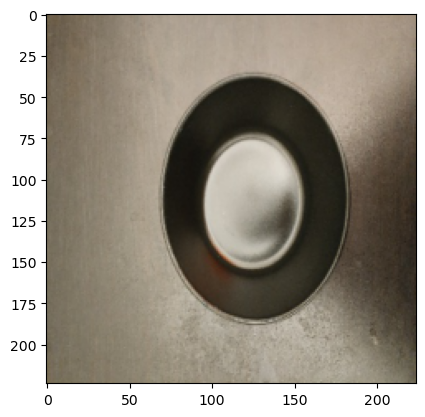

In [6]:
X_batch, y_batch = next(val_iter)
plt.imshow(X_batch[0].permute(1, 2, 0).numpy());

Создадим функцию для вывода изображений

**Задание**: Выведите все изображения в первом батче при помощи функции show_input.

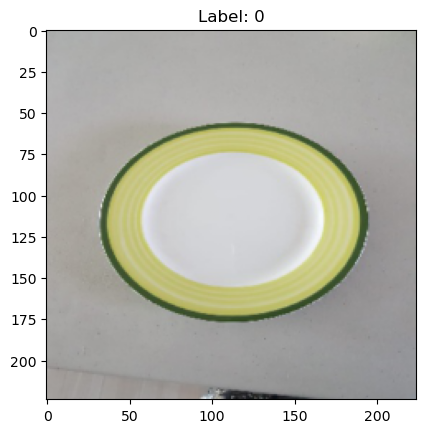

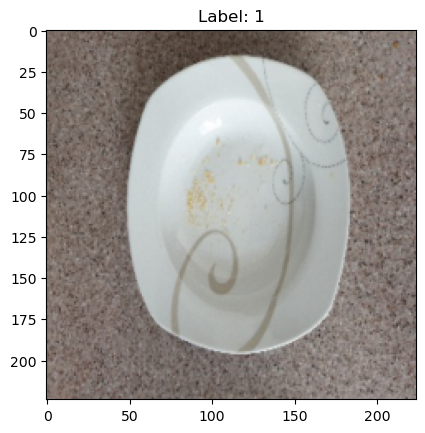

In [8]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    # image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

#---------------------------------------#
# Получаем первый батч из загрузчика
inputs, labels = next(val_iter)

for i in range(inputs.size(0)):
    show_input(inputs[i], title=f'Label: {labels[i].item()}')
#---------------------------------------#

Реализуем функцию для обучения модели.
Функция работает по следующему алгоритму:

* В фазе обучения
  1.   Загрузка тренирововчных данных при помощи `DataLoader`
  2.   Вычисление прямого распространения сигнала по сети
  3.   Вычисление значение функции ошибки
  4.   Вычисление градиентов
  5.   Изменение весовых параметров сети
* В фазе валидации
  1.   Загрузка валидационных данных при помощи `DataLoader`
  2.   Вычисление прямого распространения сигнала по сети
  3.   Вычисление значение функции ошибки

In [11]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Каждую эпоху происходят тренировочные и валидационные фазы
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Переводим модель в режим train
            else:
                dataloader = val_dataloader
                # Переводим модель в режим eval, чтобы параметр модели не изменялись
                model.eval()

            running_loss = 0.
            running_acc = 0.

            # Загружаем входные данные
            for inputs, labels in tqdm(dataloader):
                # Переносим данные на видеокарту
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # Выполняем прямой проход по сети и вычисляем значение функции ошибки
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # обратное распространение + изменение параметров
                    # (только в фазу train)
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)
            if (epoch % 10 == 0):
                print('\n{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return model

## Подготовка модели ResNet18

Для начала создадим модель сети. Так как данная модель уже реализована в библиотеке `torchvision` просто импортируем ее из модуля `torchvision.models`.
В библиотеке реализованы только слои со свертками и пуллингами, поэтому нам необходимо добавить полносвязный слой, который и будет производить классификацию.

In [12]:
# Создание модели
model = models.resnet18()

# Добавляем в конец модели полносвязный слой
model.fc = torch.nn.Linear(model.fc.in_features, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Переносим параметры модели на GPU
model = model.to(device)

# Задаем функцию потерь и оптимизатор
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# Уменьшает шаг градиентоного спуска каждую седьмую эпоху
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

<span style="color:red">!!! Обратите внимание на количество обучаемых параметров !!!</span>

In [13]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {num_params:,} trainable parameters')

The model has 11,177,538 trainable parameters


## Обучение

In [14]:
train_model(model, loss, optimizer, scheduler, num_epochs=50);

Epoch 0/49:


C:\Users\RBT\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
100%|██████████| 17/17 [00:55<00:00,  3.28s/it]


train Loss: 1.7000 Acc: 0.2647



100%|██████████| 3/3 [00:24<00:00,  8.17s/it]


val Loss: 4.0554 Acc: 0.5000
Epoch 1/49:



100%|██████████| 3/3 [00:10<00:00,  3.61s/it]

Epoch 2/49:



100%|██████████| 3/3 [00:10<00:00,  3.45s/it]

Epoch 3/49:



100%|██████████| 3/3 [00:10<00:00,  3.37s/it]

Epoch 4/49:



100%|██████████| 3/3 [00:14<00:00,  4.77s/it]

Epoch 5/49:



100%|██████████| 3/3 [00:13<00:00,  4.35s/it]

Epoch 6/49:



100%|██████████| 3/3 [00:09<00:00,  3.25s/it]

Epoch 7/49:



100%|██████████| 3/3 [00:10<00:00,  3.34s/it]

Epoch 8/49:



100%|██████████| 3/3 [00:09<00:00,  3.04s/it]

Epoch 9/49:



100%|██████████| 3/3 [00:10<00:00,  3.61s/it]

Epoch 10/49:



100%|██████████| 17/17 [00:18<00:00,  1.10s/it]


train Loss: 0.7141 Acc: 0.5000



100%|██████████| 3/3 [00:10<00:00,  3.36s/it]


val Loss: 0.8824 Acc: 0.3333
Epoch 11/49:



100%|██████████| 3/3 [00:12<00:00,  4.01s/it]

Epoch 12/49:



100%|██████████| 3/3 [00:09<00:00,  3.03s/it]

Epoch 13/49:



100%|██████████| 3/3 [00:10<00:00,  3.38s/it]

Epoch 14/49:



100%|██████████| 3/3 [00:07<00:00,  2.65s/it]

Epoch 15/49:



100%|██████████| 3/3 [00:10<00:00,  3.55s/it]

Epoch 16/49:



100%|██████████| 3/3 [00:08<00:00,  2.73s/it]

Epoch 17/49:



100%|██████████| 3/3 [00:08<00:00,  2.76s/it]

Epoch 18/49:



100%|██████████| 3/3 [00:15<00:00,  5.32s/it]

Epoch 19/49:



100%|██████████| 3/3 [00:18<00:00,  6.02s/it]

Epoch 20/49:



100%|██████████| 17/17 [00:26<00:00,  1.57s/it]


train Loss: 0.6554 Acc: 0.5882



100%|██████████| 3/3 [00:10<00:00,  3.66s/it]


val Loss: 0.8391 Acc: 0.1667
Epoch 21/49:



100%|██████████| 3/3 [00:11<00:00,  3.99s/it]

Epoch 22/49:



100%|██████████| 3/3 [00:09<00:00,  3.17s/it]

Epoch 23/49:



100%|██████████| 3/3 [00:09<00:00,  3.11s/it]

Epoch 24/49:



100%|██████████| 3/3 [00:09<00:00,  3.28s/it]

Epoch 25/49:



100%|██████████| 3/3 [00:09<00:00,  3.14s/it]

Epoch 26/49:



100%|██████████| 3/3 [00:09<00:00,  3.25s/it]

Epoch 27/49:



100%|██████████| 3/3 [00:09<00:00,  3.11s/it]

Epoch 28/49:



100%|██████████| 3/3 [00:12<00:00,  4.03s/it]

Epoch 29/49:



100%|██████████| 3/3 [00:10<00:00,  3.36s/it]

Epoch 30/49:



100%|██████████| 17/17 [00:19<00:00,  1.15s/it]


train Loss: 0.6441 Acc: 0.6765



100%|██████████| 3/3 [00:10<00:00,  3.56s/it]


val Loss: 0.8726 Acc: 0.1667
Epoch 31/49:



100%|██████████| 3/3 [00:11<00:00,  3.87s/it]

Epoch 32/49:



100%|██████████| 3/3 [00:11<00:00,  3.86s/it]

Epoch 33/49:



100%|██████████| 3/3 [00:16<00:00,  5.57s/it]

Epoch 34/49:



100%|██████████| 3/3 [00:18<00:00,  6.18s/it]

Epoch 35/49:



100%|██████████| 3/3 [00:16<00:00,  5.58s/it]

Epoch 36/49:



100%|██████████| 3/3 [00:08<00:00,  2.72s/it]

Epoch 37/49:



100%|██████████| 3/3 [00:07<00:00,  2.48s/it]

Epoch 38/49:



100%|██████████| 3/3 [00:07<00:00,  2.40s/it]

Epoch 39/49:



100%|██████████| 3/3 [00:08<00:00,  2.77s/it]

Epoch 40/49:



100%|██████████| 17/17 [00:16<00:00,  1.04it/s]


train Loss: 0.6745 Acc: 0.5294



100%|██████████| 3/3 [00:07<00:00,  2.48s/it]


val Loss: 0.8286 Acc: 0.1667
Epoch 41/49:



100%|██████████| 3/3 [00:07<00:00,  2.37s/it]

Epoch 42/49:



100%|██████████| 3/3 [00:08<00:00,  2.83s/it]

Epoch 43/49:



100%|██████████| 3/3 [00:09<00:00,  3.11s/it]

Epoch 44/49:



100%|██████████| 3/3 [00:13<00:00,  4.61s/it]

Epoch 45/49:



100%|██████████| 3/3 [00:13<00:00,  4.52s/it]

Epoch 46/49:



100%|██████████| 3/3 [00:10<00:00,  3.42s/it]

Epoch 47/49:



100%|██████████| 3/3 [00:12<00:00,  4.33s/it]

Epoch 48/49:



100%|██████████| 3/3 [00:09<00:00,  3.28s/it]

Epoch 49/49:



100%|██████████| 3/3 [00:11<00:00,  3.86s/it]


## Проверяем на тестовой выборке

Так как класс `ImageFolder` принимает на вход путь, где лежат папки, в которых нанаходятся изображения определенного класса, то для загрузки тестового датасета необходимо скопировать изображения в папке `test`  в папку `test/unknown`, чтобы загружчик работал корректно.

In [15]:
test_dir = 'test'
shutil.copytree(os.path.join(data_root, 'test'), os.path.join(test_dir, 'unknown'))

FileExistsError: [WinError 183] Невозможно создать файл, так как он уже существует: 'test\\unknown'

Также, чтобы корректно сформировать файл, который потом будет загружен на Kaggle, нам необходимо получить пути к изображениям. Для этого был создан класс `ImageFolderWithPaths`, который возвращает не только изображения и метки, но еще и пути к изображениям.

In [16]:
class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

test_dataset = ImageFolderWithPaths('test', val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

**Задание**: Вычислите финальную точность сети на обучающем наборе данных

In [19]:
from torchvision import datasets, transforms

# Трансформации для валидации и тестов (например, изменение размера и нормализация)
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Загрузка обучающего датасета
train_dataset = datasets.ImageFolder(os.path.join(data_root, 'train'), transform=val_transforms)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# Функция для вычисления точности
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Устанавливаем режим валидации (без обучения)
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Получаем предсказания модели
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            # Считаем правильные предсказания
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total * 100
    return accuracy

# Вычисляем точность на обучающем датасете
train_accuracy = calculate_accuracy(model, train_dataloader, device)
print(f'Точность на обучающем наборе: {train_accuracy:.2f}%')


Точность на обучающем наборе: 50.00%


Вычислим предсказания сети для тестовой выборки

In [21]:
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:, 1].data.cpu().numpy())
    test_img_paths.extend(paths)

# Объединяем предсказания в один массив
test_predictions = np.concatenate(test_predictions)

100%|██████████| 372/372 [01:43<00:00,  3.60it/s]


Посмотрим, что получилось

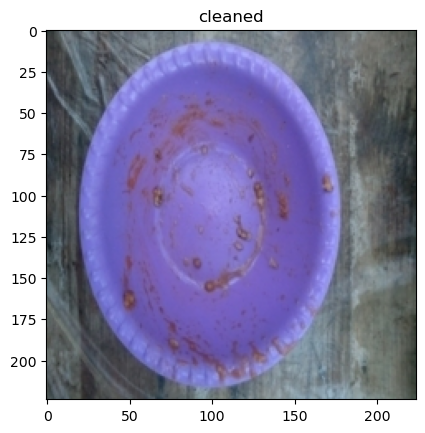

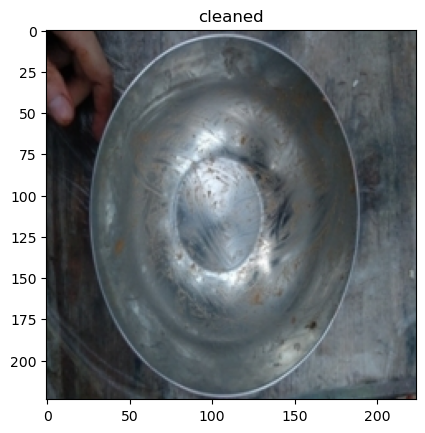

In [24]:
inputs, labels, paths = next(iter(test_dataloader))
func = lambda pred: 'dirty' if pred > 0.5 else 'cleaned'

for img, pred in zip(inputs, test_predictions):
  show_input(img, title=func(pred))

Для того, чтобы получить финальную точность на тестовой выборке необходимо загрузить файл submission.csv на сайт Kaggle. Для этого необходимо пеерйти на [страницу соревнования](https://www.kaggle.com/competitions/platesv2/data). URL: https://www.kaggle.com/competitions/platesv2/data.
Далее нажать кнопку Submit Predictions и выгрузить файл. После этого система вычислит и покажет вам финальную точность.

В следующих ячейках происходит сохранение предсказаний модели в CSV файл.

In [25]:
submission_df = pd.DataFrame({
    'id': [path.split('\\')[-1].replace('.jpg', '') for path in test_img_paths],
    'label': test_predictions
})

In [26]:
submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.5 else 'cleaned')

# Приводим тип id к int32 и удаляем лишние символы
submission_df['id'] = submission_df['id'].str.replace('test/unknown/', '', regex=False)  # Убираем префикс
submission_df['id'] = submission_df['id'].astype(np.int32)  # Преобразуем в int32

# Устанавливаем индекс
submission_df.set_index('id', inplace=True)

# Проверяем типы данных
print(submission_df.dtypes)  # Для проверки типов данных в DataFrame

# Выводим первые 6 строк для проверки
print(submission_df.head(n=6))

label    object
dtype: object
      label
id         
0   cleaned
1   cleaned
2   cleaned
3   cleaned
4   cleaned
5   cleaned


In [27]:
submission_df.to_csv('data/submission.csv')


**Задание**: Напишите здесь, какая у вас получилась точность - 0.35080

Если ваша точность составила более 0.6, то вы счастливчик)

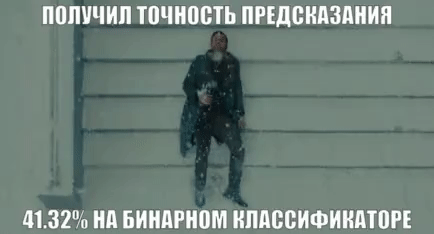

Неужели все настолько безнадежно? Конечно же нет!

Применим первую технику: **трансферное обучение**.

# **Сеть ResNet18 с применением трансферного обучения**

Главная идея трансферного обучения заключается в том, чтобы взять заранее обученную на другом наборе данных модель и дообучить ее для своей задачи. При этом не обязательно обучать все слои сети, так как в предобученной моделе начальные слои уже умеют хорошо выделять необходимые признаки из изображений.

Transfer learning эффективнее на порядок по сравнению со случайной инициализацией, потому что вам только нужно оптимизировать параметры конечного полностью связанного слоя, а это означает, что вы можете иметь фантастическую производительность всего лишь с несколькими десятками изображений в классе.

В основном код остается неизменным, за исключением нескольких моментов. В библиотеке `torchvision` модель ResNet18 была предобучена на наборе данных [IMAGENET1K](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html), и перед обучением изображения данного датасета были преодобработаны. Чтобы наша сеть также хорошо выделяла признаки из наших данных необходимо их нормализовать аналогичным образом. Для этого к преобразованиям изображений была добавлена трансформация нормировки: `transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])`.

## Подготовка датасета

**Задание**: Создайте итератор для получения изображение из папки с валидационными изображениями.

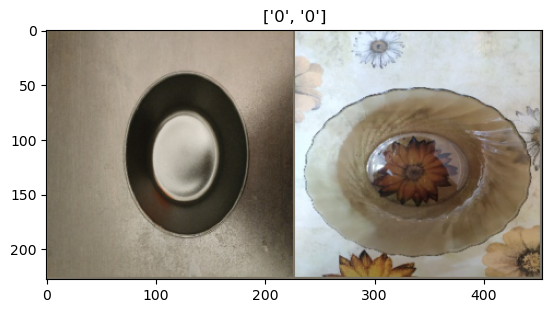

In [28]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 2
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)

#----------------------#
# Создаем DataLoader для валидационного датасета
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size
)

# Пример функции для отображения нескольких изображений
def imshow(inp, title=None):
    """Функция для отображения изображения из тензора."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # Де-нормализация
    inp = np.clip(inp, 0, 1)  # Обрезаем значения, чтобы они были в диапазоне [0, 1]
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.show()

# Пример итерации по валидационному DataLoader и отображение изображений
val_iter = iter(val_dataloader)  # Создаем итератор
inputs, labels = next(val_iter)  # Получаем первую партию изображений и меток

# Отображаем изображения из первой партии
out = torchvision.utils.make_grid(inputs)  # Объединяем в один коллаж
imshow(out, title=[str(label.item()) for label in labels])  # Вывод с метками классов

#----------------------#

**Задание**: Выведите все изображения первого батча.

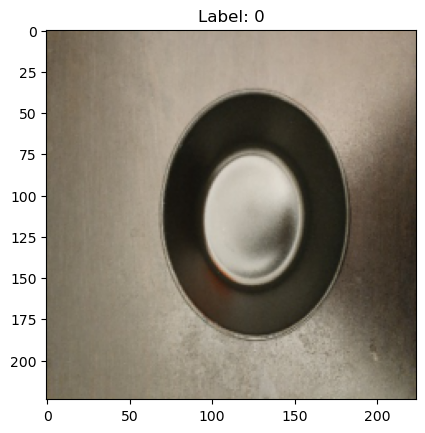

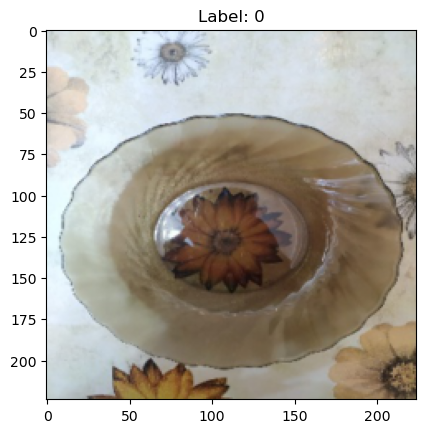

In [29]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

#----------------------#
for i in range(len(inputs)):
    show_input(inputs[i], title=f'Label: {labels[i].item()}')

#----------------------#

## Подготовка предобученное модели ResNet18

Для того, чтобы загрузить предобученную модель модель необходимо указать параметр `pretrained=True`.

Также для того, чтобы не обучать всю модель полностью мы отключим возможность обучения всех слоев сети, кроме полносвязного слоя.

**Задание**: Определите функцию потерь и оптимизатор

In [31]:
model = models.resnet18(pretrained=True)

# Отключение возможности расчета градиентов у всех слоев загруженной сети
for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

#------------------------#
import torch

# Определение функции потерь (например, кросс-энтропия для классификации)
loss_fn = torch.nn.CrossEntropyLoss()

# Используем оптимизатор Adam только для обучения последнего полносвязного слоя
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)

# Планировщик уменьшает шаг обучения каждые 7 эпох
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

#------------------------#

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

C:\Users\RBT\miniconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RBT\miniconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Обратите внимаение, что количество обучаемых параметров уменьшилось

In [32]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {num_params:,} trainable parameters')

The model has 1,026 trainable parameters


## Обучение

In [33]:
train_model(model, loss, optimizer, scheduler, num_epochs=50);

Epoch 0/49:


C:\Users\RBT\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
100%|██████████| 17/17 [00:41<00:00,  2.46s/it]


train Loss: 0.7981 Acc: 0.4412



100%|██████████| 3/3 [00:17<00:00,  5.88s/it]


val Loss: 0.5142 Acc: 0.6667
Epoch 1/49:



100%|██████████| 3/3 [00:10<00:00,  3.45s/it]

Epoch 2/49:



100%|██████████| 3/3 [00:09<00:00,  3.18s/it]

Epoch 3/49:



100%|██████████| 3/3 [00:08<00:00,  2.92s/it]

Epoch 4/49:



100%|██████████| 3/3 [00:09<00:00,  3.00s/it]

Epoch 5/49:



100%|██████████| 3/3 [00:08<00:00,  2.99s/it]

Epoch 6/49:



100%|██████████| 3/3 [00:10<00:00,  3.63s/it]

Epoch 7/49:



100%|██████████| 3/3 [00:10<00:00,  3.37s/it]

Epoch 8/49:



100%|██████████| 3/3 [00:09<00:00,  3.20s/it]

Epoch 9/49:



100%|██████████| 3/3 [00:11<00:00,  3.67s/it]

Epoch 10/49:



100%|██████████| 17/17 [00:14<00:00,  1.18it/s]


train Loss: 0.5694 Acc: 0.7059



100%|██████████| 3/3 [00:10<00:00,  3.36s/it]


val Loss: 0.7301 Acc: 0.5000
Epoch 11/49:



100%|██████████| 3/3 [00:09<00:00,  3.01s/it]

Epoch 12/49:



100%|██████████| 3/3 [00:13<00:00,  4.54s/it]

Epoch 13/49:



100%|██████████| 3/3 [00:09<00:00,  3.14s/it]

Epoch 14/49:



100%|██████████| 3/3 [00:09<00:00,  3.10s/it]

Epoch 15/49:



100%|██████████| 3/3 [00:09<00:00,  3.03s/it]

Epoch 16/49:



100%|██████████| 3/3 [00:08<00:00,  2.96s/it]

Epoch 17/49:



100%|██████████| 3/3 [00:09<00:00,  3.06s/it]

Epoch 18/49:



100%|██████████| 3/3 [00:09<00:00,  3.33s/it]

Epoch 19/49:



100%|██████████| 3/3 [00:09<00:00,  3.19s/it]

Epoch 20/49:



100%|██████████| 17/17 [00:12<00:00,  1.39it/s]


train Loss: 0.5311 Acc: 0.7647



100%|██████████| 3/3 [00:10<00:00,  3.64s/it]


val Loss: 0.7176 Acc: 0.5000
Epoch 21/49:



100%|██████████| 3/3 [00:09<00:00,  3.24s/it]

Epoch 22/49:



100%|██████████| 3/3 [00:09<00:00,  3.11s/it]

Epoch 23/49:



100%|██████████| 3/3 [00:09<00:00,  3.05s/it]

Epoch 24/49:



100%|██████████| 3/3 [00:09<00:00,  3.16s/it]

Epoch 25/49:



100%|██████████| 3/3 [00:10<00:00,  3.35s/it]

Epoch 26/49:



100%|██████████| 3/3 [00:09<00:00,  3.04s/it]

Epoch 27/49:



100%|██████████| 3/3 [00:09<00:00,  3.15s/it]

Epoch 28/49:



100%|██████████| 3/3 [00:08<00:00,  2.95s/it]

Epoch 29/49:



100%|██████████| 3/3 [00:09<00:00,  3.30s/it]

Epoch 30/49:



100%|██████████| 17/17 [00:11<00:00,  1.44it/s]


train Loss: 0.5256 Acc: 0.7647



100%|██████████| 3/3 [00:09<00:00,  3.04s/it]


val Loss: 0.7227 Acc: 0.5000
Epoch 31/49:



100%|██████████| 3/3 [00:09<00:00,  3.02s/it]

Epoch 32/49:



100%|██████████| 3/3 [00:09<00:00,  3.05s/it]

Epoch 33/49:



100%|██████████| 3/3 [00:09<00:00,  3.02s/it]

Epoch 34/49:



100%|██████████| 3/3 [00:12<00:00,  4.11s/it]

Epoch 35/49:



100%|██████████| 3/3 [00:09<00:00,  3.26s/it]

Epoch 36/49:



100%|██████████| 3/3 [00:09<00:00,  3.05s/it]

Epoch 37/49:



100%|██████████| 3/3 [00:09<00:00,  3.13s/it]

Epoch 38/49:



100%|██████████| 3/3 [00:09<00:00,  3.12s/it]

Epoch 39/49:



100%|██████████| 3/3 [00:09<00:00,  3.04s/it]

Epoch 40/49:



100%|██████████| 17/17 [00:13<00:00,  1.27it/s]


train Loss: 0.5955 Acc: 0.6765



100%|██████████| 3/3 [00:09<00:00,  3.17s/it]


val Loss: 0.7697 Acc: 0.5000
Epoch 41/49:



100%|██████████| 3/3 [00:09<00:00,  3.26s/it]

Epoch 42/49:



100%|██████████| 3/3 [00:09<00:00,  3.17s/it]

Epoch 43/49:



100%|██████████| 3/3 [00:09<00:00,  3.19s/it]

Epoch 44/49:



100%|██████████| 3/3 [00:12<00:00,  4.02s/it]

Epoch 45/49:



100%|██████████| 3/3 [00:16<00:00,  5.36s/it]

Epoch 46/49:



100%|██████████| 3/3 [00:13<00:00,  4.43s/it]

Epoch 47/49:



100%|██████████| 3/3 [00:16<00:00,  5.53s/it]

Epoch 48/49:



100%|██████████| 3/3 [00:21<00:00,  7.32s/it]

Epoch 49/49:



100%|██████████| 3/3 [00:12<00:00,  4.23s/it]


## Проверяем на тестовой выборке

In [34]:
test_dataset = ImageFolderWithPaths('test', val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

**Задание**: Вычислите финальную точность сети на обучающем наборе данных

In [36]:
#---------------------------#
def calculate_accuracy(dataloader, model):
    """Вычисляет точность модели на данном датасете."""
    model.eval()  # Переключаем модель в режим валидации
    correct = 0
    total = 0

    with torch.no_grad():  # Отключаем вычисление градиентов
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Получаем предсказания модели
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            # Считаем количество верных предсказаний
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

# Вычисляем точность на обучающем наборе данных
train_accuracy = calculate_accuracy(train_dataloader, model)
print(f'Точность на обучающем наборе: {train_accuracy:.2f}%')

#---------------------------#

Точность на обучающем наборе: 85.29%


In [37]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Переключаем модель в режим оценки
model.eval()

test_predictions = []
test_img_paths = []

# Получение предсказаний
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:, 1].data.cpu().numpy())
    test_img_paths.extend(paths)

# Объединяем предсказания в один массив
test_predictions = np.concatenate(test_predictions)

100%|██████████| 372/372 [03:41<00:00,  1.68it/s]


In [38]:
inputs, labels, paths = next(iter(test_dataloader))

In [39]:
submission_df = pd.DataFrame({
    'id': [int(path.split('\\')[-1].replace('.jpg', '')) for path in test_img_paths],
    'label': test_predictions
})

In [40]:
# Преобразуем предсказания в метки
submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.5 else 'cleaned')

# Приводим тип id к int32
submission_df['id'] = submission_df['id'].astype(np.int32)

# Устанавливаем индекс
submission_df.set_index('id', inplace=True)

In [41]:
submission_df.to_csv('data/submission.csv', index=True)

**Задание**: Напишите здесь, какая у вас получилась точность на тесте 0.75403  

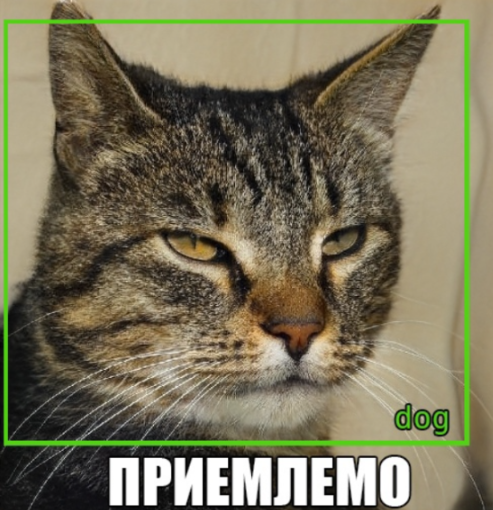

Пока точность не 100% еще есть куда стремиться, но что же можно еще сделать?

Попробуем увеличить нашу обучающую выборку.

# **Сеть ResNet18 с применением трансферного обучения и аугментацией данных**

Чем больше разных данных нейронная сеть получит во время обучения, тем, в теории, лучше она будет работать на данных которые она никогда раньше не видела.

Аугментация данных — это важный этап обучения моделей машинного обучения. Под аугментацией данных понимается увеличение выборки данных для обучения через модификацию существующих данных. Использование методов аугментации данных показало себя хорошо на задаче классификации изображений.

Существует множество способов аугментации изображений:

  *   Отображение по вертикали или горизонтали (англ. flipping).
  *   Поворот изображения на определенный угол (англ. rotation).
  *   Создание отступа (англ. padding).
  *   Вырезание части изображения (англ. cropping).
  *   Добавление шума (англ. adding noise).
  *   Манипуляции с цветом (англ. color jittering).
  *   и т.д.

О аугментациях, которые реализованы в библиотеке PyTorch и, которые были применены в данной задаче можно почиатть по ссылке: https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

Аугментация позволяет решить сразу две проблемы:


1.   Аугментация позволяет увеличить размер обучающего набора данных
2.   Позволяет уменьшить вероятность переобучения модели (когда модель показывает высокую точность на обучающей выборке, но на тестовой выборке точно значительно ниже)





## Подготовка датасета

Создаем загрузчики изображений, которые автоматически будут применять аугментации с данным в разных комбинациях.

**Задание**: Создайте итератор для получения изображение из папки с валидационными изображениями.

In [43]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models

train_transforms = [
    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.RandomOrder([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
        ]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.RandomRotation(45),
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.RandomGrayscale(p=1),
    transforms.RandomOrder([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
        ]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),

    transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0.4, hue=0.4),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
]

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torch.utils.data.ConcatDataset([
    torchvision.datasets.ImageFolder(train_dir, train_transform)
    for train_transform in train_transforms])

val_dataset = torch.utils.data.ConcatDataset([
    torchvision.datasets.ImageFolder(val_dir, train_transform)
    for train_transform in train_transforms])

batch_size = 2
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)

#----------------------#
# Подготовка загрузчика для валидационного набора данных
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

for images, labels in val_dataloader:
    print(images.shape)  # Размеры батча изображений
    print(labels)        # Метки для изображений

#----------------------#

torch.Size([2, 3, 224, 224])
tensor([0, 0])
torch.Size([2, 3, 224, 224])
tensor([0, 1])
torch.Size([2, 3, 224, 224])
tensor([1, 1])


**Задание**: Выведите все изображения первого батча.

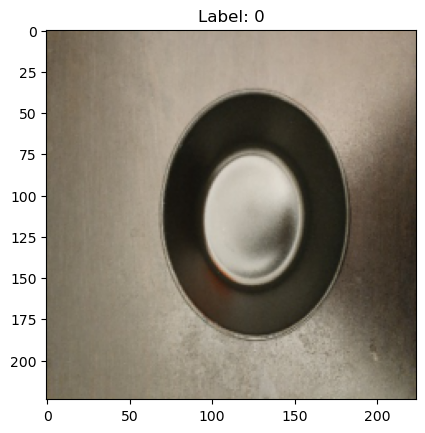

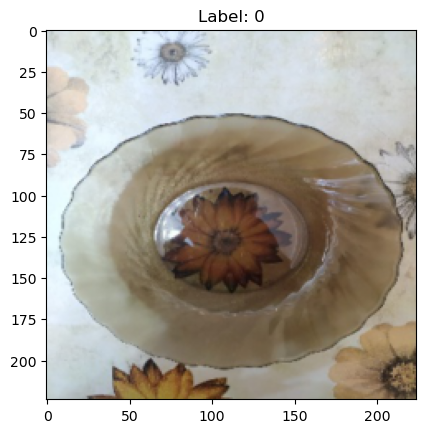

In [45]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

#----------------------#

for inputs, labels in val_dataloader:
    # Проходим только первый батч
    for i in range(inputs.size(0)):  # inputs.size(0) — это размер батча
        show_input(inputs[i], title=f'Label: {labels[i].item()}')  # Отображаем каждое изображение с меткой
    break  # Убираем break для продолжения итерации в реальном использовании
#----------------------#

## Подготовка предобученное модели ResNet18

**Задание**: Отключите обучение для всех слоев ResNet, кроме последнего и полносвязного слоев.

**Задание**: Определите функцию потерь и оптимизатор

In [46]:
import torch
from torchvision import models

# Загружаем предобученную модель ResNet18
model = models.resnet18(pretrained=True)

# Отключаем обучение для всех слоев модели
for param in model.parameters():
    param.requires_grad = False

# "Размораживаем" последний сверточный блок (layer4) для обучения
for param in model.layer4.parameters():
    param.requires_grad = True

# Полносвязный слой (обновляем его для 2 классов)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

# Активируем градиенты для полносвязного слоя
for param in model.fc.parameters():
    param.requires_grad = True

# Переносим модель на устройство (GPU/CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Определяем функцию потерь
loss = torch.nn.CrossEntropyLoss()

# Определяем оптимизатор (обучаем только размороженные параметры)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1.0e-3)

# Планировщик для уменьшения скорости обучения каждые 7 эпох
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Проверяем количество обучаемых параметров
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)


C:\Users\RBT\miniconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RBT\miniconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Проверка

In [55]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
assert(num_params == 8394754)

## Обучение

In [48]:
train_model(model, loss, optimizer, scheduler, num_epochs=50);

Epoch 0/49:


C:\Users\RBT\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
100%|██████████| 119/119 [00:59<00:00,  2.01it/s]


train Loss: 0.8510 Acc: 0.6555



100%|██████████| 3/3 [00:00<00:00,  4.84it/s]


val Loss: 0.4019 Acc: 0.6667
Epoch 1/49:



100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

Epoch 2/49:



100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

Epoch 3/49:



100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

Epoch 4/49:



100%|██████████| 3/3 [00:00<00:00,  6.41it/s]

Epoch 5/49:



100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

Epoch 6/49:



100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

Epoch 7/49:



100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

Epoch 8/49:



100%|██████████| 3/3 [00:00<00:00,  4.90it/s]

Epoch 9/49:



100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

Epoch 10/49:



100%|██████████| 119/119 [00:50<00:00,  2.37it/s]


train Loss: 0.0513 Acc: 0.9916



100%|██████████| 3/3 [00:00<00:00,  6.10it/s]


val Loss: 0.3075 Acc: 0.8333
Epoch 11/49:



100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

Epoch 12/49:



100%|██████████| 3/3 [00:00<00:00,  5.30it/s]

Epoch 13/49:



100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

Epoch 14/49:



100%|██████████| 3/3 [00:00<00:00,  5.21it/s]

Epoch 15/49:



100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

Epoch 16/49:



100%|██████████| 3/3 [00:00<00:00,  5.20it/s]

Epoch 17/49:



100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

Epoch 18/49:



100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

Epoch 19/49:



100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

Epoch 20/49:



100%|██████████| 119/119 [00:39<00:00,  3.04it/s]


train Loss: 0.0287 Acc: 0.9958



100%|██████████| 3/3 [00:00<00:00,  6.50it/s]


val Loss: 0.2949 Acc: 0.8333
Epoch 21/49:



100%|██████████| 3/3 [00:00<00:00,  6.78it/s]

Epoch 22/49:



100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

Epoch 23/49:



100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

Epoch 24/49:



100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

Epoch 25/49:



100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

Epoch 26/49:



100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

Epoch 27/49:



100%|██████████| 3/3 [00:00<00:00,  5.25it/s]

Epoch 28/49:



100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

Epoch 29/49:



100%|██████████| 3/3 [00:00<00:00,  7.23it/s]

Epoch 30/49:



100%|██████████| 119/119 [00:39<00:00,  3.02it/s]


train Loss: 0.0231 Acc: 1.0000



100%|██████████| 3/3 [00:00<00:00,  6.93it/s]


val Loss: 0.2008 Acc: 1.0000
Epoch 31/49:



100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

Epoch 32/49:



100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

Epoch 33/49:



100%|██████████| 3/3 [00:00<00:00,  7.14it/s]

Epoch 34/49:



100%|██████████| 3/3 [00:00<00:00,  7.20it/s]

Epoch 35/49:



100%|██████████| 3/3 [00:00<00:00,  6.94it/s]

Epoch 36/49:



100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

Epoch 37/49:



100%|██████████| 3/3 [00:00<00:00,  6.80it/s]

Epoch 38/49:



100%|██████████| 3/3 [00:00<00:00,  6.59it/s]

Epoch 39/49:



100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

Epoch 40/49:



100%|██████████| 119/119 [00:37<00:00,  3.15it/s]


train Loss: 0.0284 Acc: 1.0000



100%|██████████| 3/3 [00:00<00:00,  7.43it/s]


val Loss: 0.2350 Acc: 1.0000
Epoch 41/49:



100%|██████████| 3/3 [00:00<00:00,  6.82it/s]

Epoch 42/49:



100%|██████████| 3/3 [00:00<00:00,  6.99it/s]

Epoch 43/49:



100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

Epoch 44/49:



100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

Epoch 45/49:



100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

Epoch 46/49:



100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

Epoch 47/49:



100%|██████████| 3/3 [00:00<00:00,  6.88it/s]

Epoch 48/49:



100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

Epoch 49/49:



100%|██████████| 3/3 [00:00<00:00,  6.23it/s]


## Проверяем на тестовой выборке

**Задание**: Получите значение точности на обучающей выборке (не забудьте переопределить загрузчик изображений, чтобы не применять аугментации при вычислении финальной точности)

In [49]:
#-----------------#
# Переопределяем трансформации для оценки модели на обучающей выборке
eval_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Создаем датасет и загрузчик для обучающей выборки без аугментаций
train_eval_dataset = torchvision.datasets.ImageFolder(train_dir, eval_transforms)
train_eval_dataloader = torch.utils.data.DataLoader(
    train_eval_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Переводим модель в режим оценки
    correct = 0
    total = 0

    # Отключаем вычисление градиентов для ускорения
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Прогоняем данные через модель
            outputs = model(inputs)

            # Выбираем предсказанный класс с максимальным значением
            _, preds = torch.max(outputs, 1)

            # Считаем количество правильных предсказаний
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    # Возвращаем процент правильных предсказаний
    accuracy = correct / total
    return accuracy
# Вычисляем точность на обучающей выборке
train_accuracy = calculate_accuracy(model, train_eval_dataloader, device)
print(f"Точность на обучающей выборке: {train_accuracy * 100:.2f}%")

#-----------------#

Точность на обучающей выборке: 91.18%


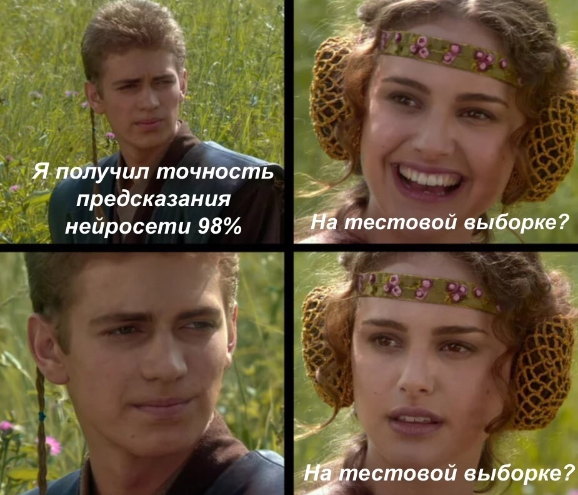

In [50]:
test_dataset = ImageFolderWithPaths('test', val_transforms)

test_dataloader = torch.utils.data.DataLoader(
  test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [51]:
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:, 1].data.cpu().numpy())
    test_img_paths.extend(paths)

# Объединяем предсказания в один массив
test_predictions = np.concatenate(test_predictions)

100%|██████████| 372/372 [01:07<00:00,  5.47it/s]


In [52]:
submission_df = pd.DataFrame({
    'id': [path.split('\\')[-1].replace('.jpg', '') for path in test_img_paths],
    'label': test_predictions
})

In [53]:
# Преобразуем предсказания в метки
submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.5 else 'cleaned')

# Приводим тип id к int32 и удаляем лишние символы
submission_df['id'] = submission_df['id'].str.replace('test/unknown/', '', regex=False)  # Убираем префикс
submission_df['id'] = submission_df['id'].astype(np.int32)  # Преобразуем в int32

# Устанавливаем индекс
submission_df.set_index('id', inplace=True)

In [54]:
submission_df.to_csv('data/submission.csv')

**Задание**: Напишите здесь, какая у вас получилась точность на тесте - 0.89381